# World Happiness Report Analysis

We can recall how contriversial the political landscape was across the world was in 2015. By analyzing if there was any change in sample populations by region we can use those insights to influence either current policy or future policiy decisions, to suit our constituants, in any industry. I beleieve factors like country GDP, and generosity will have a significant impcat on countries happieness. We will visualize and test the means from 2015 and 2016 with A/B tests and observe if there was in a significant difference in various categories, like happieness. 

We will be analyzing the World Happiness Data Report from 2015 adn 2016 gathered by Gallup World Poll. From kaggle that can be found here :https://www.kaggle.com/unsdsn/world-happiness.

The data consists of "happiness [and] ranking scores" based on respones to main life evaluations questions and ranking on a float scale from 0 to 10, 10 being a better outlook on question. From the data description, the file consists of data from 2015-2019, however we will be examining only 2015 and 2016 as those were the election years. 




In [1]:
# load nesc. libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
import math

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# # connecting and mounting to my drive 
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [8]:
# uploading the two years with same column variables 
file_source = 'https://www.kaggle.com/unsdsn/world-happiness'
try:
    df_2015 = pd.read_csv('2015.csv')
    df_2016 = pd.read_csv('2016.csv')
except:
    print('Please Download and Extract the zip from {} into your drive'.format(file_source))
# viewing the column names
    print('The shape of the 2015 dataframe: ', df_2015.shape)
    display(df_2015.columns)

    print('\nThe shape of the 2016 dataframe: ', df_2016.shape)
    display(df_2016.columns)

Here we can see that due to how this data was collected and compiled over the years some values likes Confidence Interval is included for some years while Standard Error is included for others. We can now select the columns we want from each dataframe add a year column to each dataframe and then merge to do EDA.  -- (Years other than 2015 and 2016 (Future Work))

In [9]:
int_columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']
df_2015 = df_2015[int_columns]
df_2016 = df_2016[int_columns]

# adding the each year respectively
df_2015['Year'] = 2015
df_2016['Year'] = 2016
# confirming it gave us same number of columns 
print('The shape of the 2015 dataframe: ', df_2015.shape)
display(df_2015.columns)

print('\nThe shape of the 2016 dataframe: ', df_2016.shape)
display(df_2016.columns)

The shape of the 2015 dataframe:  (158, 11)


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')


The shape of the 2016 dataframe:  (157, 11)


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [10]:
dfs = [df_2016, df_2015]  # creating a list of dataframes so then we can use pandas concat to concat the list
df = pd.concat(dfs)
print('Shape of comined dataframe is: ', df.shape)
df.head()

Shape of comined dataframe is:  (315, 11)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


We have joined the data into one dataframe. Now the next step in the intial data processing step would be to check for missing values. However in this case I believe I can assume the data is not from a raw source and therefore has already been tidied. Now we need to find EDA to find insights. 

In [11]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

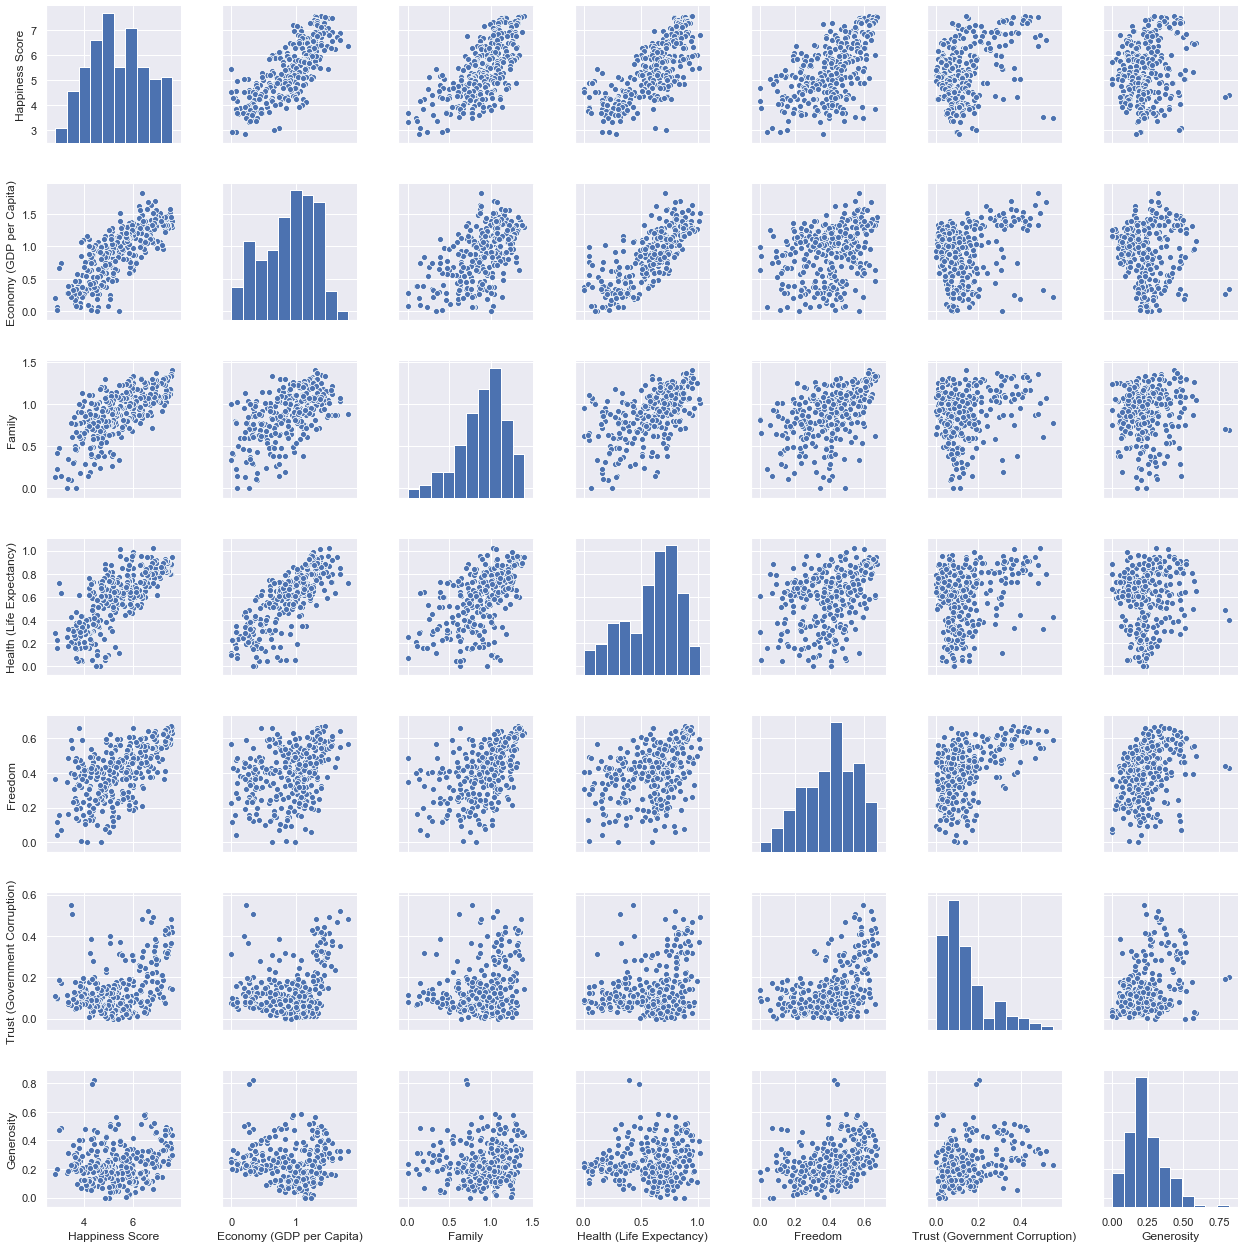

In [12]:
# We can do a pairplot as an oversight to see distributions of variables and overall patterns, if any

sns.pairplot(df.drop(['Year', 'Happiness Rank'], axis=1))

From pair plots above we can see some pretty clear correlations such as Happiness Score and Life Expectacy, Hapiness and how someone think about their family, and clear GDP per capita and Happiness. These are intuitve correlations we can compare all to see which might be the strongest using pearson correlation.

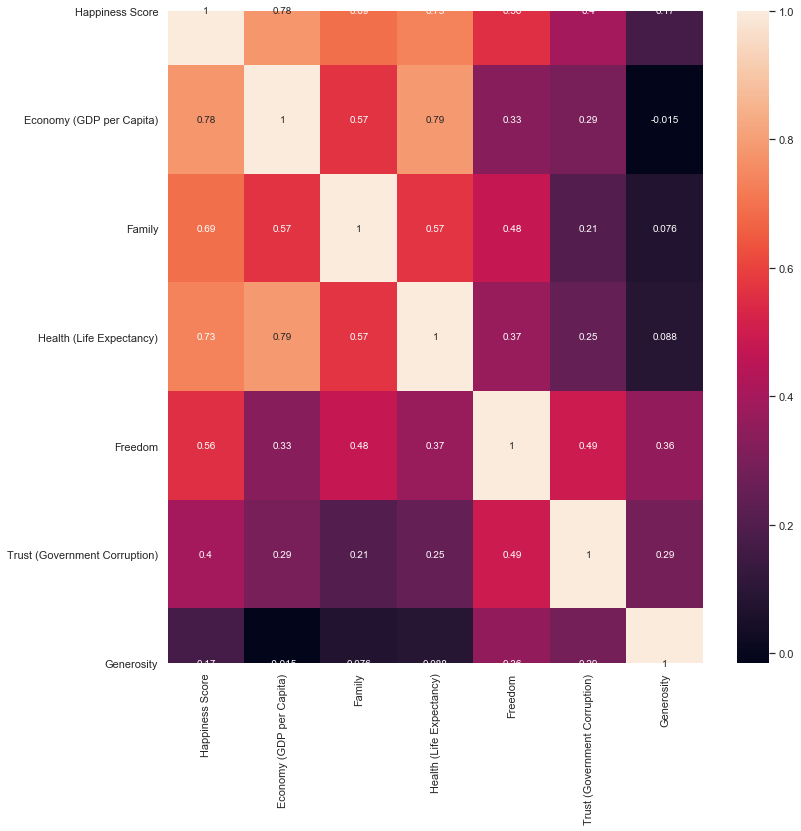

In [13]:
## looking at correlations and their pairwise correlations 
corr = df.drop(['Happiness Rank', 'Year'], axis =1).corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True)
fig = ax.get_figure()
fig.savefig('CorrelationPlot.png')


# downloads file from google directry
# from google.colab import files
# files.download( "CorrelationPlot.png" )    

Here we can see some of the intuitve correlations such as GDP per Capita and how someone thinks about their health and their families health and well-being. However a category such as geneoristy actually not having much of a correlation. We can do fututher to see wee how correlated (linear, non-linear)

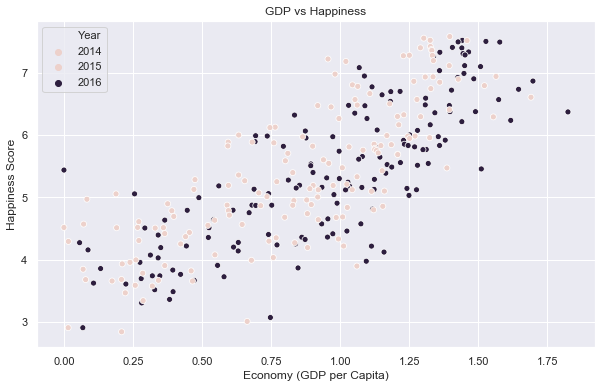

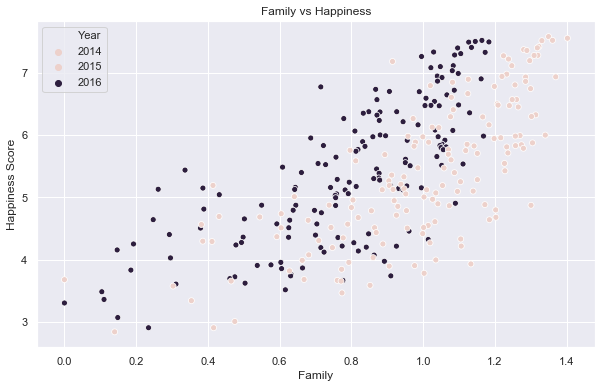

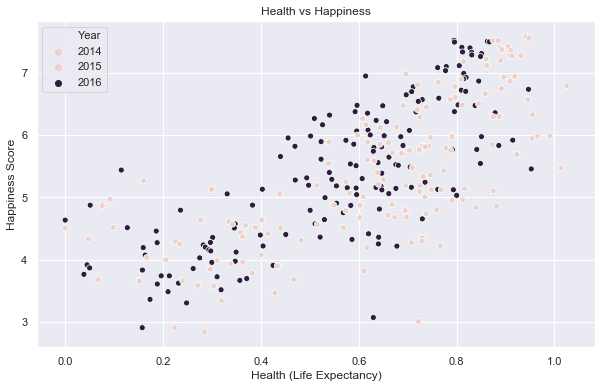

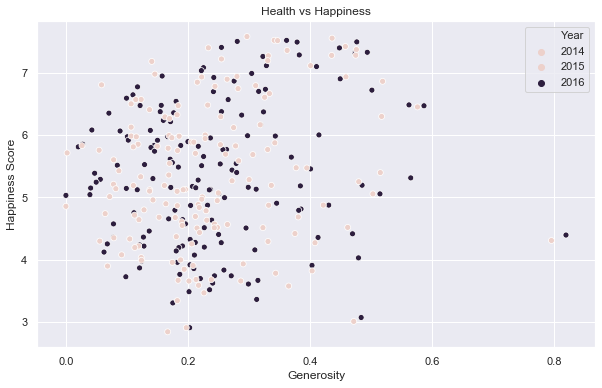

In [14]:
# Further EDA

def scatter_plot(y,x,cat,df, title):
  fig, ax =plt.subplots(figsize=(10,6))
  ax = sns.scatterplot(x,y,cat, data=df)
  ax.set_title(title)
  plt.show()

scatter_plot('Happiness Score', 'Economy (GDP per Capita)', 'Year', df, 'GDP vs Happiness')
# fig.savefig('GDP vs Hap.png')
# files.download( "GDP vs Hap.png" )    
scatter_plot('Happiness Score', 'Family', 'Year', df, 'Family vs Happiness')
# fig.savefig('Family vs Hap.png')
# files.download( 'Family vs Hap.png' )   
scatter_plot('Happiness Score', 'Health (Life Expectancy)', 'Year', df, 'Health vs Happiness')
# fig.savefig('Health vs Hap.png')
# files.download( 'Health vs Hap.png' )   
scatter_plot('Happiness Score', 'Generosity', 'Year', df, 'Health vs Happiness')


Again we can see the same type of correlations as abover where the most correlated factor to Happiness is Economic GDP. We can also see the intuitive correlations such as Life Expectancy and GDP which is absolutely makes sense. One suprising find was that Generosity was not very correlated to Happiness Score or anything else. We can also see 2016 Happiness scores seem to be higher than 2015. We will look at distributions before then comparing in bar charts and running AB t-Tests

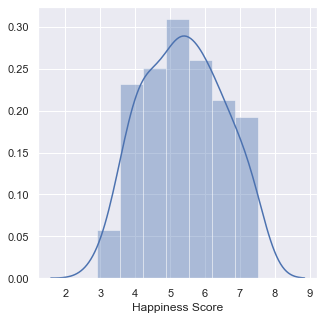

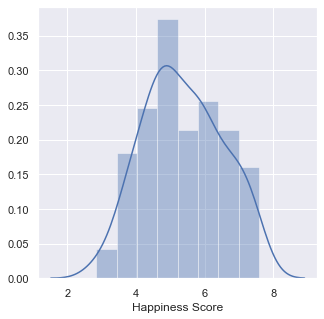

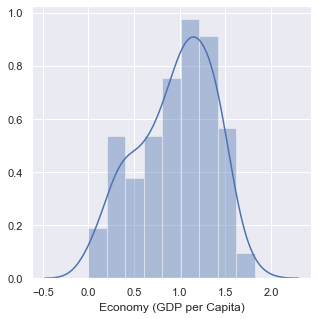

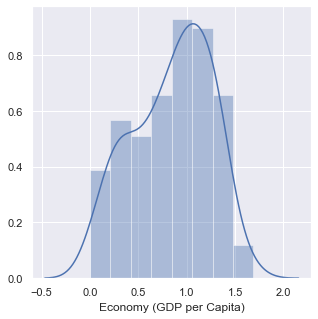

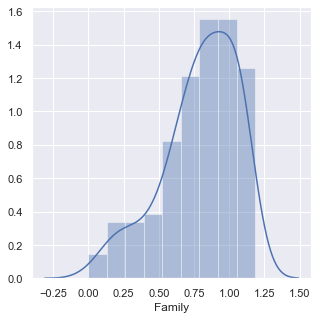

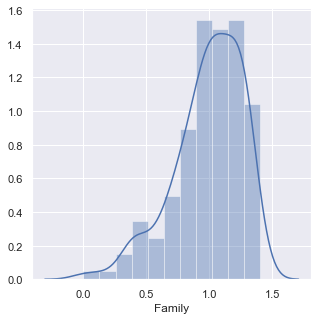

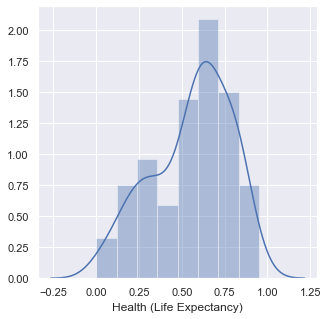

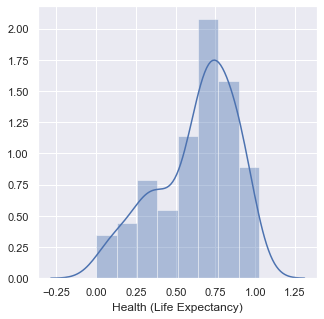

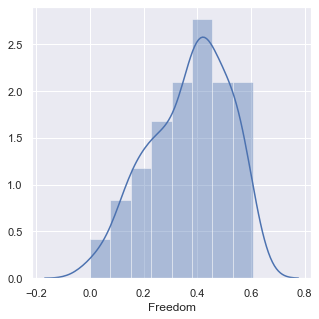

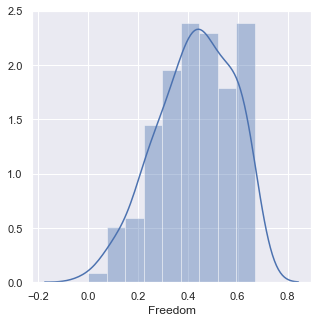

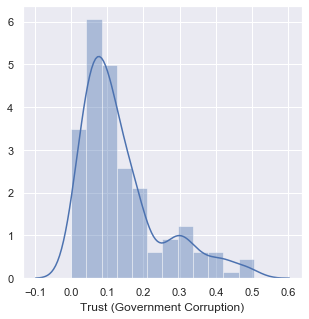

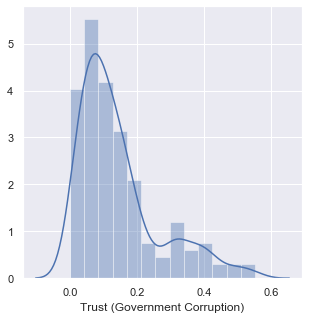

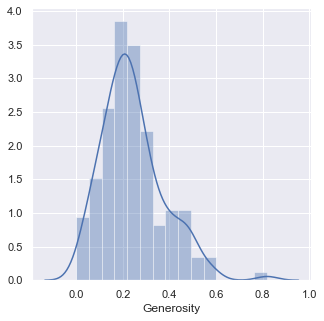

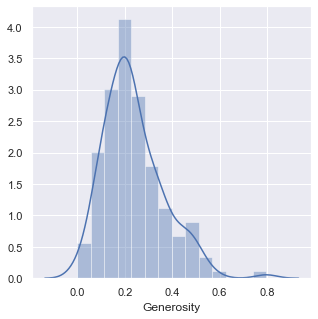

In [15]:
def dist_plot(x, df, var, group):
  sns.distplot(df[x].iloc[(df[var] == group).values], label = True)
  plt.show()


for col in df.drop(['Happiness Rank', 'Region', 'Country', 'Year'], axis=1).columns:
# for i in range(0, len(df.drop(['Happiness Rank', 'Region', 'Country', 'Year'], axis=1).columns)):

  num_years = len(df['Year'].unique())

 
  for year in df['Year'].unique():
    # print(num_years)
    fig, ax = plt.subplots(figsize=(5,5))
    
    dist_plot(col, df, 'Year', year,)


Here we can see the distribution plots for each year. Though the distributions are not perfectly normally however they don't seem to change much from year to year in overall shape. So we can contiune with our ttest

We can observe alot of what happened between 2015 and 2016 now we will do statistical analysis and check the distributions between the years and run t-tests.


 Happiness Rank


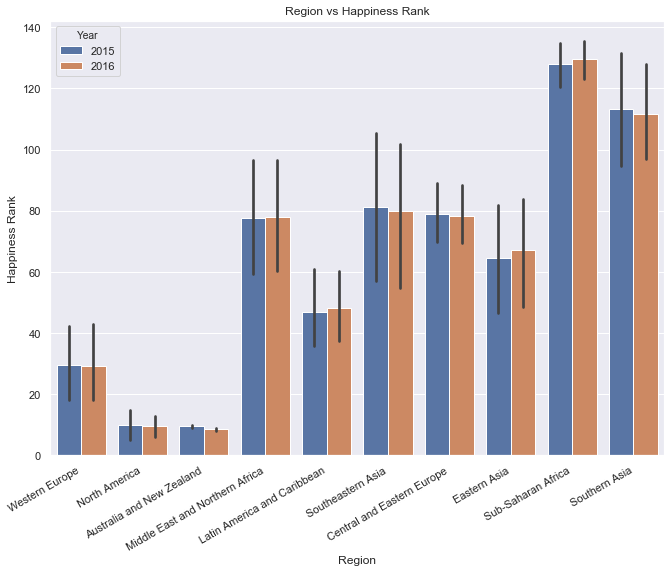

A/B ttest based on year for each Region
Western Europe P value 0.9708413885013042 ['We cannot reject the Null Hyp']
North America P value 0.9421685068033759 ['We cannot reject the Null Hyp']
Australia and New Zealand P value 0.29289321881345254 ['We cannot reject the Null Hyp']
Middle East and Northern Africa P value 0.9705730664530784 ['We cannot reject the Null Hyp']
Latin America and Caribbean P value 0.8699078562422989 ['We cannot reject the Null Hyp']
Southeastern Asia P value 0.9487967485083276 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.9365556381204214 ['We cannot reject the Null Hyp']
Eastern Asia P value 0.8530961225780102 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.7241570142999324 ['We cannot reject the Null Hyp']
Southern Asia P value 0.9153530798570676 ['We cannot reject the Null Hyp']

 Happiness Score


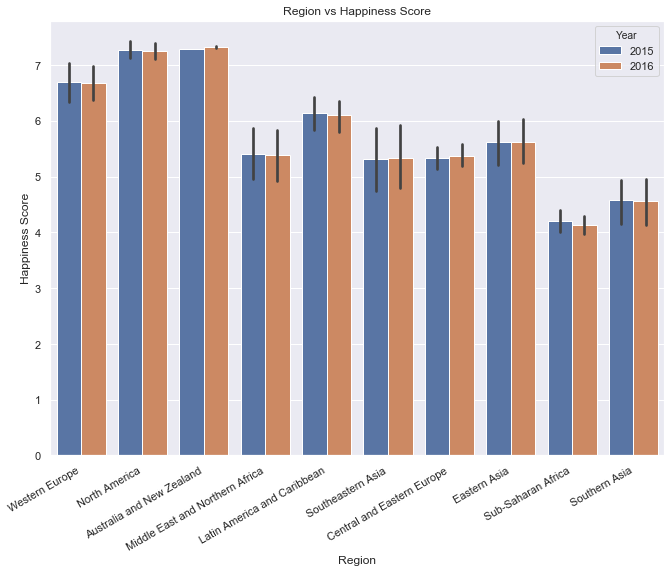

A/B ttest based on year for each Region
Western Europe P value 0.9874181598850352 ['We cannot reject the Null Hyp']
North America P value 0.9376270919207782 ['We cannot reject the Null Hyp']
Australia and New Zealand P value 0.06753963688143443 ['We cannot reject the Null Hyp']
Middle East and Northern Africa P value 0.952290072109549 ['We cannot reject the Null Hyp']
Latin America and Caribbean P value 0.8423593069177538 ['We cannot reject the Null Hyp']
Southeastern Asia P value 0.9620173088920527 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.8052869180404689 ['We cannot reject the Null Hyp']
Eastern Asia P value 0.9950136823164635 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.618043150891765 ['We cannot reject the Null Hyp']
Southern Asia P value 0.9567620506691086 ['We cannot reject the Null Hyp']

 Economy (GDP per Capita)


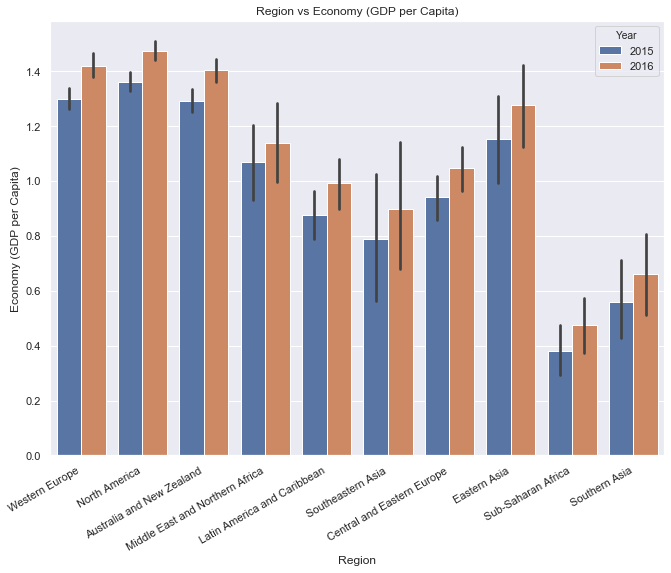

A/B ttest based on year for each Region
Western Europe P value 0.00045653236971220264 ['Reject Hyp']
North America P value 0.14191578125738202 ['We cannot reject the Null Hyp']
Australia and New Zealand P value 0.20203436092187743 ['We cannot reject the Null Hyp']
Middle East and Northern Africa P value 0.49365245481550224 ['We cannot reject the Null Hyp']
Latin America and Caribbean P value 0.07996526270978752 ['We cannot reject the Null Hyp']
Southeastern Asia P value 0.5615903526317849 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.07779019955473464 ['We cannot reject the Null Hyp']
Eastern Asia P value 0.35473291320198186 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.16632573350117846 ['We cannot reject the Null Hyp']
Southern Asia P value 0.3908121947839559 ['We cannot reject the Null Hyp']

 Family


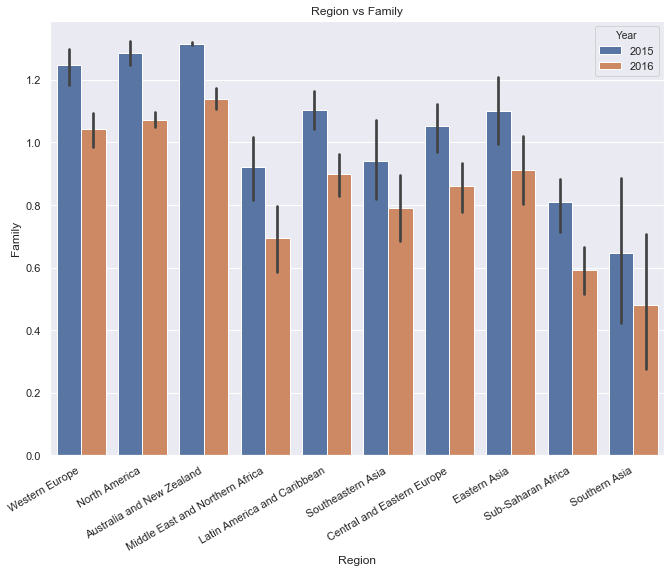

A/B ttest based on year for each Region
Western Europe P value 1.3541400168832586e-05 ['Reject Hyp']
North America P value 0.041554937402725006 ['Reject Hyp']
Australia and New Zealand P value 0.0362851958902354 ['Reject Hyp']
Middle East and Northern Africa P value 0.006067236292285462 ['Reject Hyp']
Latin America and Caribbean P value 8.782512844106874e-05 ['Reject Hyp']
Southeastern Asia P value 0.1159431669286625 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.0014421356448903314 ['Reject Hyp']
Eastern Asia P value 0.05036279740797754 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.0003429246848800396 ['Reject Hyp']
Southern Asia P value 0.3720365329028671 ['We cannot reject the Null Hyp']

 Health (Life Expectancy)


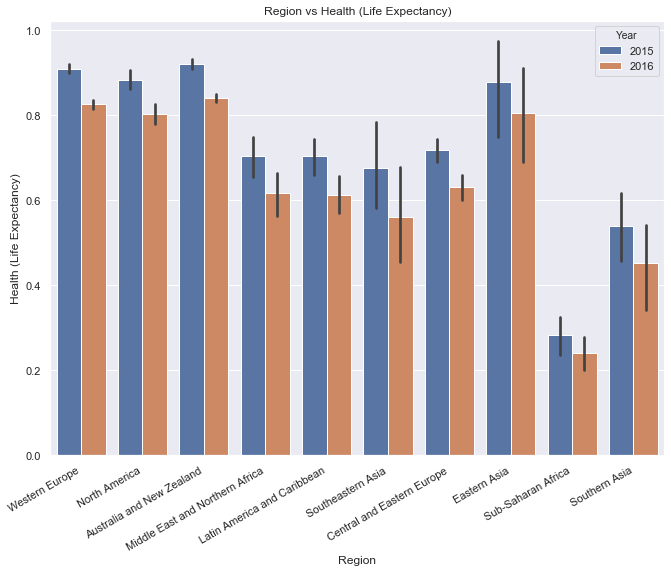

A/B ttest based on year for each Region
Western Europe P value 8.94066884107209e-13 ['Reject Hyp']
North America P value 0.133305633421183 ['We cannot reject the Null Hyp']
Australia and New Zealand P value 0.03601884202934493 ['Reject Hyp']
Middle East and Northern Africa P value 0.015722369573740468 ['Reject Hyp']
Latin America and Caribbean P value 0.00963419119622979 ['Reject Hyp']
Southeastern Asia P value 0.16677414720124456 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.00014668082707257625 ['Reject Hyp']
Eastern Asia P value 0.43463121527573767 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.1747451336431917 ['We cannot reject the Null Hyp']
Southern Asia P value 0.2413409165196727 ['We cannot reject the Null Hyp']

 Freedom


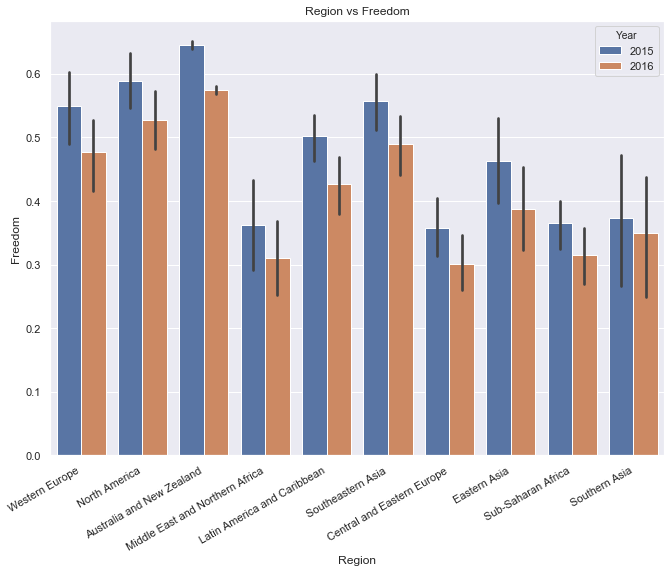

A/B ttest based on year for each Region
Western Europe P value 0.11201579390084575 ['We cannot reject the Null Hyp']
North America P value 0.43170406751537205 ['We cannot reject the Null Hyp']
Australia and New Zealand P value 0.015393201916772303 ['Reject Hyp']
Middle East and Northern Africa P value 0.2976646042463973 ['We cannot reject the Null Hyp']
Latin America and Caribbean P value 0.013751713963602145 ['Reject Hyp']
Southeastern Asia P value 0.06754716605200269 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.09484607873986951 ['We cannot reject the Null Hyp']
Eastern Asia P value 0.188154855775323 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.09350319310512727 ['We cannot reject the Null Hyp']
Southern Asia P value 0.7702668425320787 ['We cannot reject the Null Hyp']

 Trust (Government Corruption)


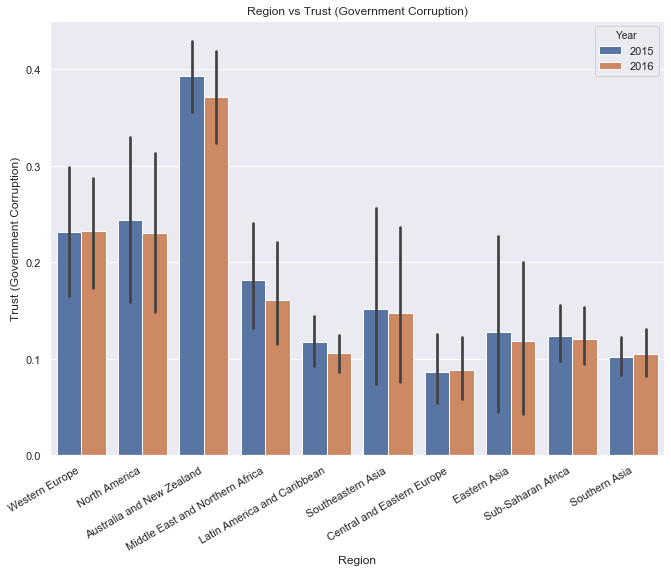

A/B ttest based on year for each Region
Western Europe P value 0.9808871797806841 ['We cannot reject the Null Hyp']
North America P value 0.9212201001364214 ['We cannot reject the Null Hyp']
Australia and New Zealand P value 0.7536668488319527 ['We cannot reject the Null Hyp']
Middle East and Northern Africa P value 0.6139695964906651 ['We cannot reject the Null Hyp']
Latin America and Caribbean P value 0.4933245949181727 ['We cannot reject the Null Hyp']
Southeastern Asia P value 0.9633261413380949 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.9553051172258396 ['We cannot reject the Null Hyp']
Eastern Asia P value 0.8978518220488507 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.8717100093699929 ['We cannot reject the Null Hyp']
Southern Asia P value 0.8980255402662064 ['We cannot reject the Null Hyp']

 Generosity


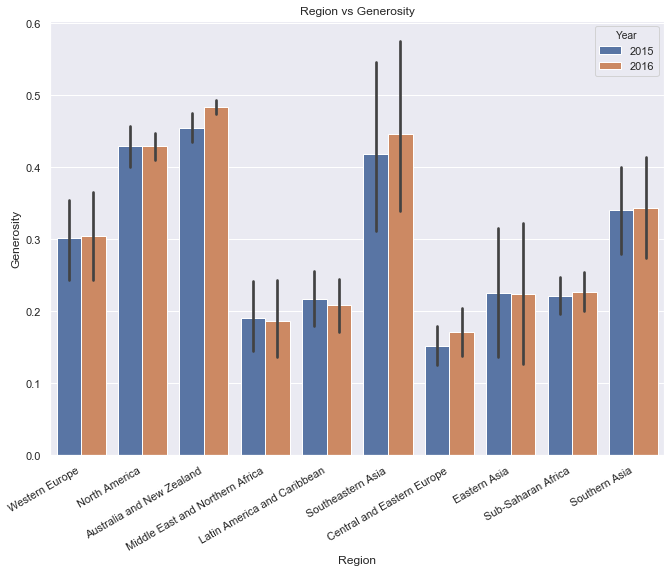

A/B ttest based on year for each Region
Western Europe P value 0.9516216987513281 ['We cannot reject the Null Hyp']
North America P value 0.9994824887044642 ['We cannot reject the Null Hyp']
Australia and New Zealand P value 0.3228913636046439 ['We cannot reject the Null Hyp']
Middle East and Northern Africa P value 0.9238231211212025 ['We cannot reject the Null Hyp']
Latin America and Caribbean P value 0.7365180830149824 ['We cannot reject the Null Hyp']
Southeastern Asia P value 0.7661178397144459 ['We cannot reject the Null Hyp']
Central and Eastern Europe P value 0.39959163896684413 ['We cannot reject the Null Hyp']
Eastern Asia P value 0.9760487664526935 ['We cannot reject the Null Hyp']
Sub-Saharan Africa P value 0.783884484435768 ['We cannot reject the Null Hyp']
Southern Asia P value 0.9727486605913603 ['We cannot reject the Null Hyp']


In [16]:
def bar_plot(x, y, group, df):
  fig, ax = plt.subplots(figsize =(11,8))
  ax = sns.barplot(x=x , y=y, hue=group, data=df)
  loc, label = plt.xticks()  # sets a location and label variable for the xticks
  ax.set_xticklabels(label, rotation = 30, ha='right')
  ax.set_title('{} vs {}'.format(x,y))
  # ax.set_xticklabels(ax.get_xticklabels(), 
  


# creating a function to loop through not only the different variables but also regions 
# to run independent A/B tests on multiple variables 
def ttest(df1, df2):
  for col in df_2015.drop(['Region', 'Country', 'Year'], axis=1).columns:
    bar_plot('Region', col, 'Year', df)
    print('\n',col)
    plt.show()
    print('\033[1m' + '\033[4m' +'A/B ttest based on year for each Region' + '\033[0m')  # using regex to add the bold+underline and then back to normal
    for region in df['Region'].unique():
      df1_region = df1[df1['Region'] == region]
      df2_region = df2[df2['Region'] == region]
      # print(region)
      ttest_result = (stats.ttest_ind(df1_region[col], df2_region[col]))
      reject_null = []  # creating empyt list to run if statement on p vales
      if ttest_result[1] > 0.05:
        reject_null.append('We cannot reject the Null Hyp')
      else:
        reject_null.append('Reject Hyp')

      print(region, 'P value', ttest_result[1], reject_null)

df_2015 = df[df['Year']==2015]
df_2016 = df[df['Year']==2016]
ttest(df_2015, df_2016)


In Conclusion, When it comes to Happiness, since the p value is much larger than 0.05 we fail to reject the null hypothesis. There is no significant difference in the means of happiness from 2015 to 2016. 

Future work icludes cleaning the data of the other years to match together and analysis of effects of events over the globe on how people react to in terms of happiness. 